<a href="https://colab.research.google.com/github/satabarto123/Project-Ames-Book/blob/main/AMES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Ames**
**Author of Notebook** :  **Satabarto Sarkar**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/AmesHousing.csv')
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [22]:
print("First 5 rows of the dataset:")
print(data.head())

missing_values = data.isnull().sum().sort_values(ascending=False)
print("\nMissing values in the dataset:")
print(missing_values[missing_values > 0])

First 5 rows of the dataset:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Co

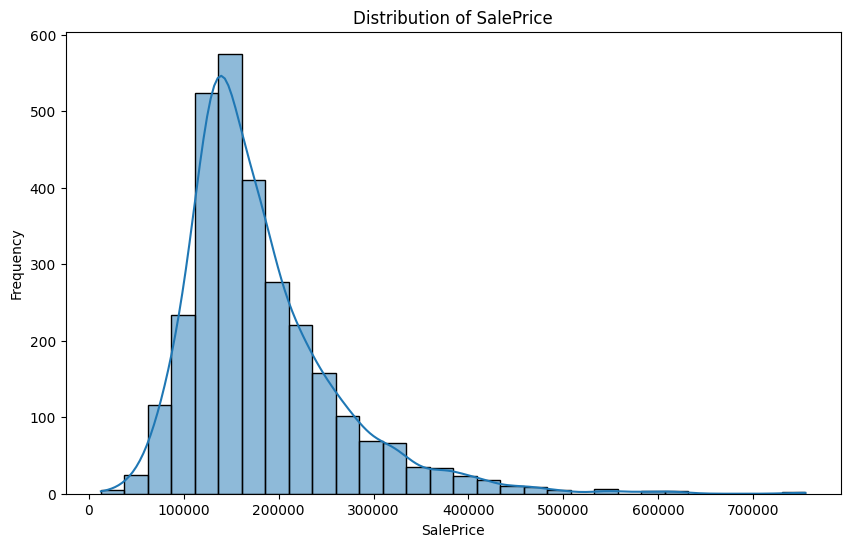

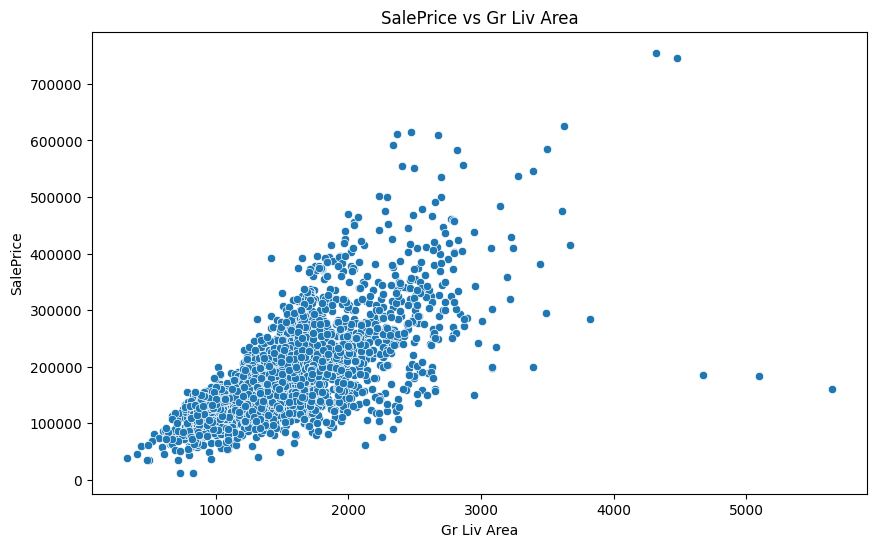

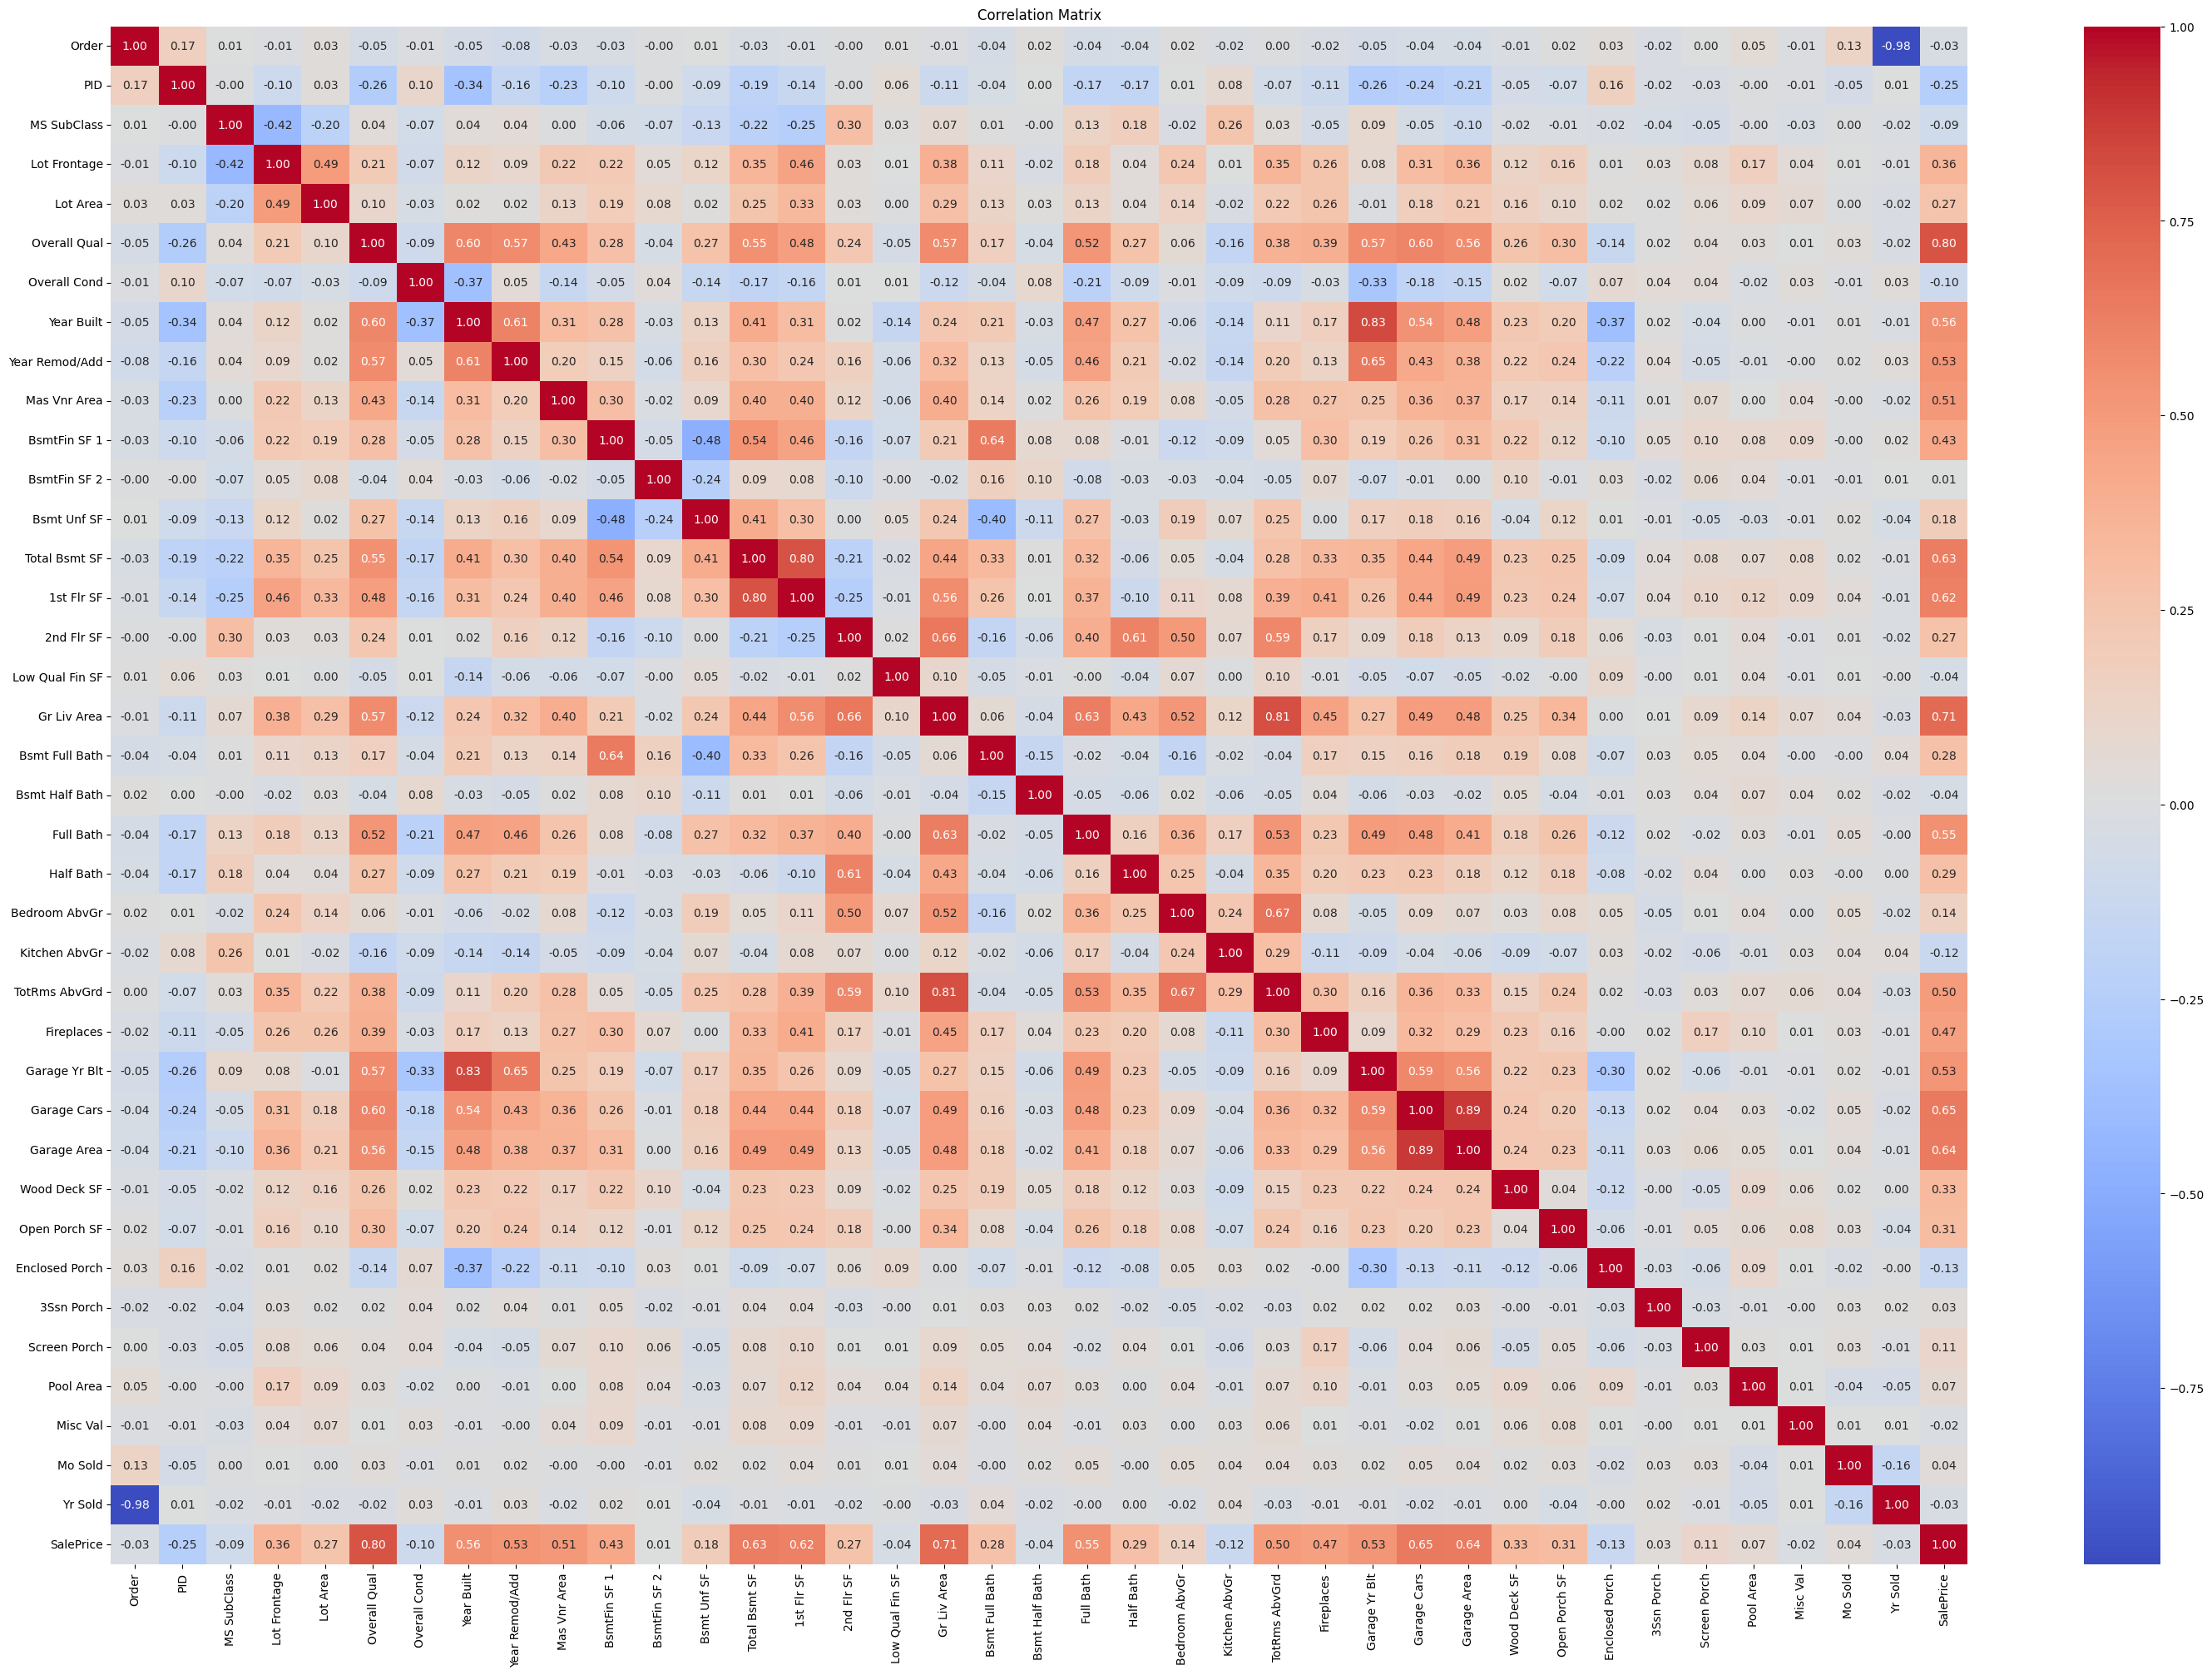

In [23]:
if 'SalePrice' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['SalePrice'], bins=30, kde=True)
    plt.title('Distribution of SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'SalePrice' not found in the data.")

x_col = 'Gr Liv Area' if 'Gr Liv Area' in data.columns else 'Gr Liv Area'
if x_col not in data.columns:
    print(f"Column '{x_col}' not found in the data.")
else:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[x_col], y=data['SalePrice'])
    plt.title('SalePrice vs Gr Liv Area')
    plt.xlabel('Gr Liv Area')
    plt.ylabel('SalePrice')
    plt.show()

numeric_data = data.select_dtypes(include=['number'])

if not numeric_data.empty:
    plt.figure(figsize=(36, 24))
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric data available for correlation analysis.")


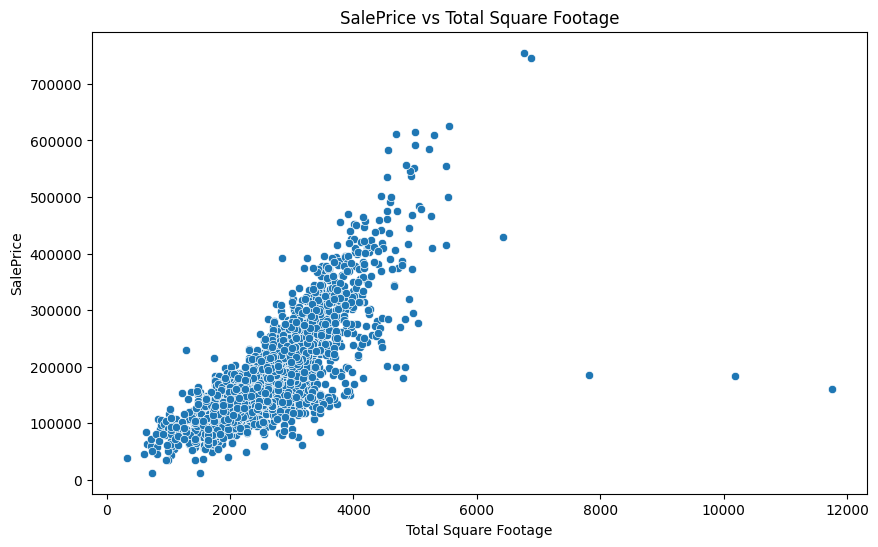

In [19]:
columns_to_drop = ['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'Id']
existing_columns = [col for col in columns_to_drop if col in data.columns]

data_cleaned = data.drop(columns=existing_columns)

for col in data_cleaned.select_dtypes(include=[np.number]).columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

for col in data_cleaned.select_dtypes(include=[object]).columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

if 'Total Bsmt SF' in data_cleaned.columns and 'Gr Liv Area' in data_cleaned.columns:
    # Total square footage
    data_cleaned['TotalSF'] = data_cleaned['Total Bsmt SF'] + data_cleaned['Gr Liv Area']

    # Visualize the new feature
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TotalSF', y='SalePrice', data=data_cleaned)
    plt.title('SalePrice vs Total Square Footage')
    plt.xlabel('Total Square Footage')
    plt.ylabel('SalePrice')
    plt.show()
else:
    print("One or both of the columns 'TotalBsmtSF' and 'GrLivArea' are missing in the dataset.")


In [21]:


data_cleaned['NewHome'] = np.where(data_cleaned['Year Built'] > 2000, 1, 0)

# T-test
group1 = data_cleaned[data_cleaned['NewHome'] == 1]['SalePrice']
group2 = data_cleaned[data_cleaned['NewHome'] == 0]['SalePrice']

t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Homes built after 2000 have higher prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference in prices.")


T-statistic: 31.33575826833472, P-value: 3.91671609938283e-186
Reject the null hypothesis: Homes built after 2000 have higher prices.
